# Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# Dataset and visualization

In [2]:
performance =pd.read_csv("StudentsPerformance.csv")
performance

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
performance.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
performance.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
cols=list(performance.columns)
cols

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

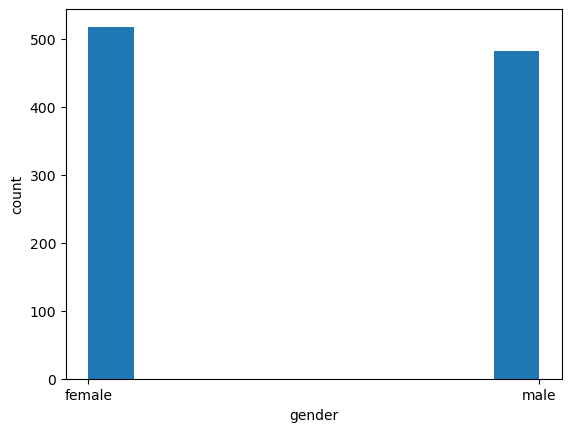

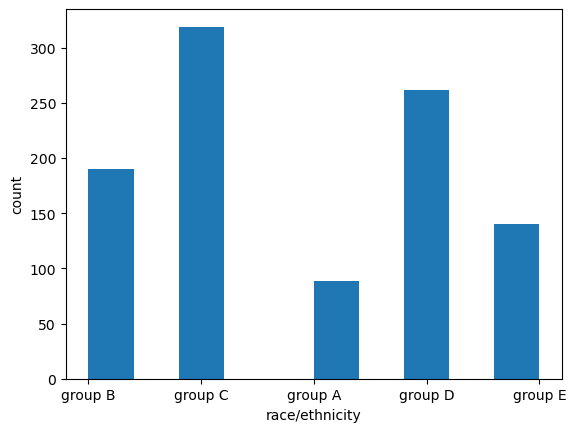

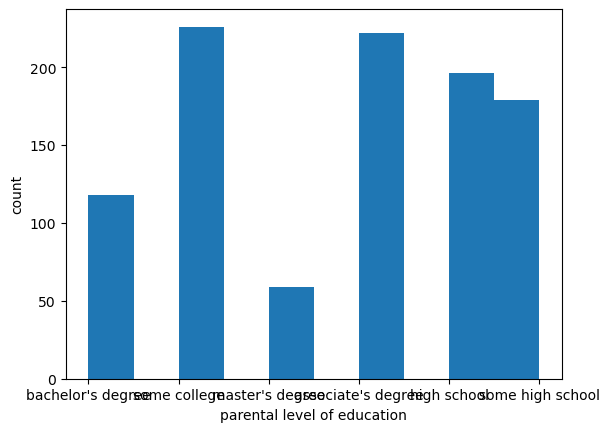

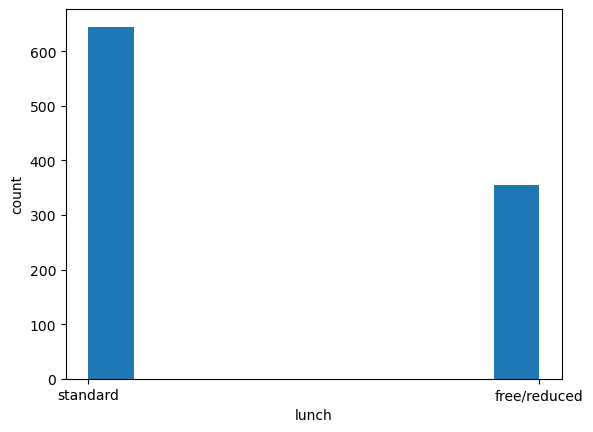

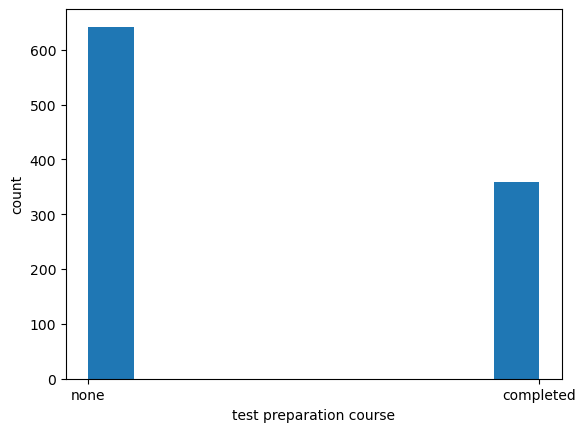

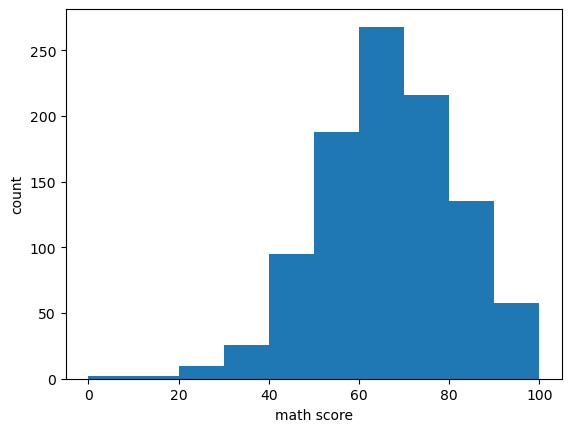

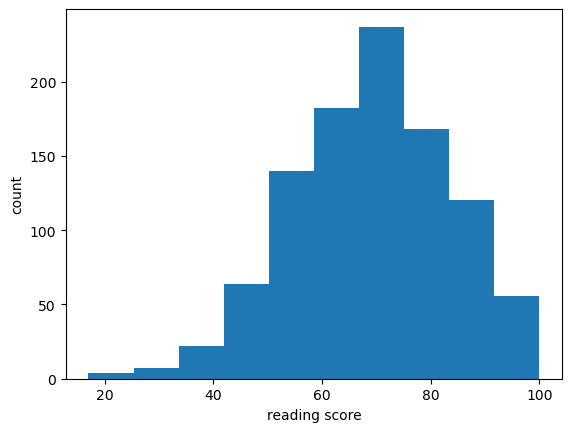

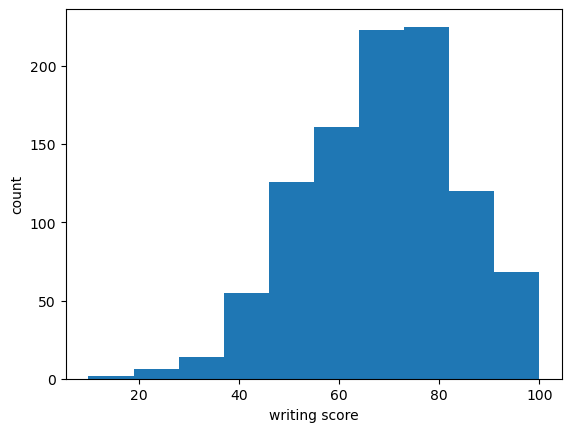

In [7]:
for x in cols:
     if(performance[x].dtypes == 'object' or performance[x].dtypes == 'int64'):
        plt.hist(performance[x])
        plt.xlabel(x)
        plt.ylabel('count')
        plt.show()

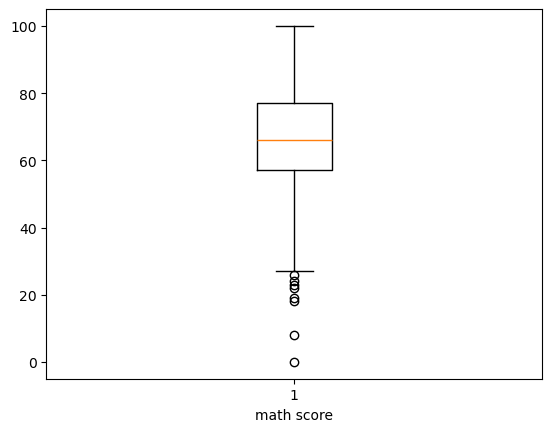

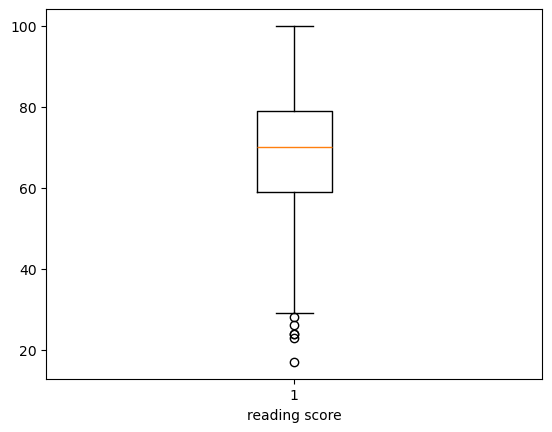

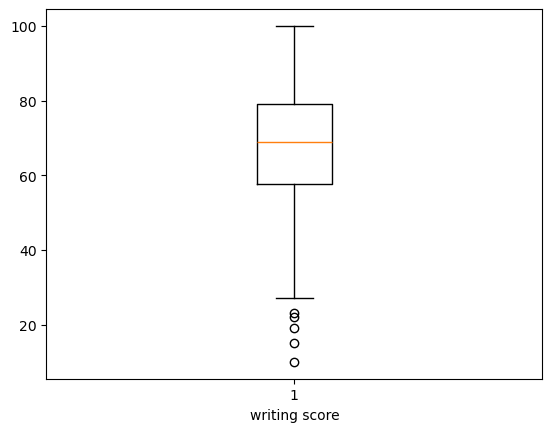

In [8]:
for x in cols:
     if(performance[x].dtypes == 'int64'):
        plt.boxplot(performance[x])
        plt.xlabel(x)
        plt.show()

- Conclusion: 
1. There are some outliers in all three scores and because of their low numbers we ingnore it for now

## Now converting the categorical columns into numerical columns

In [9]:
cat = performance[['gender','race/ethnicity','parental level of education','lunch','test preparation course']]
#adding all object cols
# here we store our original categorical data in cat

In [10]:
cat

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in cat:
    performance[i] = label_encoder.fit_transform(performance[i])
#fit --> giving the data, transform --> converting the data into numerical form

In [12]:
performance
# We made changes in original data frame while storing our original categorical columns in cat

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


In [13]:
performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int32
 1   race/ethnicity               1000 non-null   int32
 2   parental level of education  1000 non-null   int32
 3   lunch                        1000 non-null   int32
 4   test preparation course      1000 non-null   int32
 5   math score                   1000 non-null   int64
 6   reading score                1000 non-null   int64
 7   writing score                1000 non-null   int64
dtypes: int32(5), int64(3)
memory usage: 43.1 KB


## Our goal :
. Given : 	gender	race/ethnicity	parental level of education	lunch	test preparation course	reading score	writing score
- Trying to pridict : math score

In [14]:
X = performance[["gender","race/ethnicity","parental level of education","lunch","test preparation course","reading score","writing score"]]
Y = performance[["math score"]]

In [15]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,0,1,1,1,1,72,74
1,0,2,4,1,0,90,88
2,0,1,3,1,1,95,93
3,1,0,0,0,1,57,44
4,1,2,4,1,1,78,75
...,...,...,...,...,...,...,...
995,0,4,3,1,0,99,95
996,1,2,2,0,1,55,55
997,0,2,2,0,0,71,65
998,0,3,4,1,0,78,77


In [16]:
Y

,math score
0,72
1,69
2,90
3,47
4,76
...,...
995,88
996,62
997,59
998,68


## Train test split

In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=50)

In [18]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((700, 7), (300, 7), (700, 1), (300, 1))

## Standarsization

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [20]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

# REGRESSION MODEL BUILDING

## 1. Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_train_scaled,y_train)

LinearRegression()

### Prediction

In [22]:
pred_regr = regr.predict(x_test_scaled)

### Get Coeff & Intercepts

In [23]:
regr.coef_

array([[6.44126209, 0.85035633, 0.12596472, 1.68943767, 1.28318849,
        5.29522217, 9.25942084]])

In [24]:
regr.intercept_

array([65.88571429])

### Error Matrics for linear regression

In [25]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

regr_metrics = {}
# Mean Absolute Error (MAE)
regr_metrics['MAE'] = mean_absolute_error(y_test, pred_regr)

# Mean Squared Error (MSE)
regr_metrics['MSE'] = mean_squared_error(y_test, pred_regr)

# Root Mean Squared Error (RMSE)
regr_metrics['RMSE'] = np.sqrt(mean_squared_error(y_test, pred_regr))

# R-squared (Coefficient of Determination)
regr_metrics['R-squared'] = r2_score(y_test, pred_regr)

In [26]:
regr_metrics

{'MAE': 4.484501947776712,
 'MSE': 32.037829540111424,
 'RMSE': 5.660196952413531,
 'R-squared': 0.8456449500937843}

## 2. Ridge Regression

In [27]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0) 
ridge.fit(x_train_scaled,y_train)

Ridge()

### Prediction 

In [28]:
pred_ridge = ridge.predict(x_test_scaled)

### Error Matrics for Ridge regression

In [29]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

ridge_metrics = {}
# Mean Absolute Error (MAE)
ridge_metrics['MAE'] = mean_absolute_error(y_test, pred_ridge)

# Mean Squared Error (MSE)
ridge_metrics['MSE'] = mean_squared_error(y_test, pred_ridge)

# Root Mean Squared Error (RMSE)
ridge_metrics['RMSE'] = np.sqrt(mean_squared_error(y_test, pred_ridge))

# R-squared (Coefficient of Determination)
ridge_metrics['R-squared'] = r2_score(y_test, pred_ridge)

In [30]:
ridge_metrics

{'MAE': 4.483759436420881,
 'MSE': 32.0522506210242,
 'RMSE': 5.661470711840184,
 'R-squared': 0.8455754707721215}

## 3. Lasso Regression

In [31]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0) 
lasso.fit(x_train_scaled,y_train)

Lasso()

### Prediction

In [32]:
pred_lasso = lasso.predict(x_test_scaled)

### Error Matrics for Lasso regression

In [33]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

lasso_metrics = {}
# Mean Absolute Error (MAE)
lasso_metrics['MAE'] = mean_absolute_error(y_test, pred_lasso)

# Mean Squared Error (MSE)
lasso_metrics['MSE'] = mean_squared_error(y_test, pred_lasso)

# Root Mean Squared Error (RMSE)
lasso_metrics['RMSE'] = np.sqrt(mean_squared_error(y_test, pred_lasso))

# R-squared (Coefficient of Determination)
lasso_metrics['R-squared'] = r2_score(y_test, pred_lasso)

In [34]:
lasso_metrics

{'MAE': 4.823868250764269,
 'MSE': 38.57236224373737,
 'RMSE': 6.210665201388445,
 'R-squared': 0.8141622268238086}

## 4. ElasticNet Regression

In [35]:
from sklearn.linear_model import ElasticNet
# alpha: Controls the overall regularization strength (lambda in some contexts)
# l1_ratio: Controls the mix between L1 (Lasso) and L2 (Ridge) penalties.
#           0 for pure Ridge, 1 for pure Lasso, values in between for Elastic Net.
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic.fit(x_train_scaled,y_train)

ElasticNet(alpha=0.1, random_state=42)

### Prediction

In [36]:
pred_elastic = elastic.predict(x_test_scaled)

### Error Matrics for ElasticNet regression

In [37]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

elastic_metrics = {}
# Mean Absolute Error (MAE)
elastic_metrics['MAE'] = mean_absolute_error(y_test, pred_elastic)

# Mean Squared Error (MSE)
elastic_metrics['MSE'] = mean_squared_error(y_test, pred_elastic)

# Root Mean Squared Error (RMSE)
elastic_metrics['RMSE'] = np.sqrt(mean_squared_error(y_test, pred_elastic))

# R-squared (Coefficient of Determination)
elastic_metrics['R-squared'] = r2_score(y_test, pred_elastic)

In [38]:
elastic_metrics

{'MAE': 4.479627780958192,
 'MSE': 32.9327619350464,
 'RMSE': 5.7387073400763695,
 'R-squared': 0.8413332555606097}

## 5. Decision Tree Regressor

In [39]:
from sklearn.tree import DecisionTreeRegressor
dtregr = DecisionTreeRegressor(max_depth=5, random_state=42)
dtregr.fit(x_train_scaled,y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

### Prediction

In [40]:
pred_dtregr = dtregr.predict(x_test_scaled)

### Error Matrics for Decision Tree Regressor

In [41]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

dtregr_metrics = {}
# Mean Absolute Error (MAE)
dtregr_metrics['MAE'] = mean_absolute_error(y_test, pred_dtregr)

# Mean Squared Error (MSE)
dtregr_metrics['MSE'] = mean_squared_error(y_test, pred_dtregr)

# Root Mean Squared Error (RMSE)
dtregr_metrics['RMSE'] = np.sqrt(mean_squared_error(y_test, pred_dtregr))

# R-squared (Coefficient of Determination)
dtregr_metrics['R-squared'] = r2_score(y_test, pred_dtregr)

In [42]:
dtregr_metrics

{'MAE': 5.43538568173713,
 'MSE': 47.394088033259806,
 'RMSE': 6.884336426501817,
 'R-squared': 0.7716600366303105}

## 6. SVM Regressor

In [43]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(x_train_scaled,y_train)

C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, gamma=0.1)

### Prediction

In [44]:
pred_svr = svr.predict(x_test_scaled)

### Error Matrics for SVM Regressor

In [45]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

svr_metrics = {}
# Mean Absolute Error (MAE)
svr_metrics['MAE'] = mean_absolute_error(y_test, pred_svr)

# Mean Squared Error (MSE)
svr_metrics['MSE'] = mean_squared_error(y_test, pred_svr)

# Root Mean Squared Error (RMSE)
svr_metrics['RMSE'] = np.sqrt(mean_squared_error(y_test, pred_svr))

# R-squared (Coefficient of Determination)
svr_metrics['R-squared'] = r2_score(y_test, pred_svr)

In [46]:
svr_metrics

{'MAE': 4.829360747079209,
 'MSE': 38.67564619989418,
 'RMSE': 6.218974690404695,
 'R-squared': 0.8136646150805681}

## 7. K-Nearest Neighbors

In [47]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train_scaled,y_train)

KNeighborsRegressor()

### Prediction

In [48]:
pred_knn = knn.predict(x_test_scaled)

### Error Matrics for KNN Regressor

In [49]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

knn_metrics = {}
# Mean Absolute Error (MAE)
knn_metrics['MAE'] = mean_absolute_error(y_test, pred_knn)

# Mean Squared Error (MSE)
knn_metrics['MSE'] = mean_squared_error(y_test, pred_knn)

# Root Mean Squared Error (RMSE)
knn_metrics['RMSE'] = np.sqrt(mean_squared_error(y_test, pred_knn))

# R-squared (Coefficient of Determination)
knn_metrics['R-squared'] = r2_score(y_test, pred_knn)

In [50]:
knn_metrics

{'MAE': 5.600666666666667,
 'MSE': 51.213733333333344,
 'RMSE': 7.15637710949705,
 'R-squared': 0.7532573686162761}

## 8. Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(x_train_scaled,y_train)

C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

### Prediction

In [52]:
pred_forest = forest.predict(x_test_scaled)

### Error Matrics for Random Forest Regressor

In [53]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

forest_metrics = {}
# Mean Absolute Error (MAE)
forest_metrics['MAE'] = mean_absolute_error(y_test, pred_forest)

# Mean Squared Error (MSE)
forest_metrics['MSE'] = mean_squared_error(y_test, pred_forest)

# Root Mean Squared Error (RMSE)
forest_metrics['RMSE'] = np.sqrt(mean_squared_error(y_test, pred_forest))

# R-squared (Coefficient of Determination)
forest_metrics['R-squared'] = r2_score(y_test, pred_forest)

In [54]:
forest_metrics

{'MAE': 4.999852777777778,
 'MSE': 40.87153190972223,
 'RMSE': 6.393084694396143,
 'R-squared': 0.8030850579384561}

## GRADIEN BOOST

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
gboost = GradientBoostingRegressor(loss='absolute_error', learning_rate=0.1, n_estimators=250, max_depth=5)
gboost.fit(x_train_scaled,y_train)

C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(loss='absolute_error', max_depth=5, n_estimators=250)

### Prediction

In [56]:
pred_gboost = gboost.predict(x_test_scaled)

### Error Matrics for GRADIEN BOOST Regressor

In [57]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

gboost_metrics = {}
# Mean Absolute Error (MAE)
gboost_metrics['MAE'] = mean_absolute_error(y_test, pred_gboost)

# Mean Squared Error (MSE)
gboost_metrics['MSE'] = mean_squared_error(y_test, pred_gboost)

# Root Mean Squared Error (RMSE)
gboost_metrics['RMSE'] = np.sqrt(mean_squared_error(y_test, pred_gboost))

# R-squared (Coefficient of Determination)
gboost_metrics['R-squared'] = r2_score(y_test, pred_gboost)

In [58]:
gboost_metrics

{'MAE': 4.961949778241606,
 'MSE': 39.592343853515345,
 'RMSE': 6.292244738844425,
 'R-squared': 0.8092480577137073}

# END